# Exploring Network Changes

Packages used:
- [NetworkX](https://networkx.github.io)
- [Matplotlib](https://matplotlib.org)
- [Louvain Community Detection (python-louvain)](https://github.com/taynaud/python-louvain)
- [CluSim: a package for calculating clustering similarity](https://github.com/Hoosier-Clusters/clusim)
- [qgrid](https://github.com/quantopian/qgrid) to view and edit DataFrame

In [1]:
import networkx as nx
import community as louvain
from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim
from matplotlib import pyplot as plt

%matplotlib inline

DendroPY not supported.


In [2]:
def membership(d):
    _membership = {}
    for key in d.keys():
        value = d[key]
        _membership[key] = [value]
    return _membership

In [3]:
def summary(graph, communities, clustering):
    print("membership:", membership(communities))
    print("clustering: ", end="")
    print_clustering(clustering)

In [4]:
colors = {
    0: "red",
    1: "blue",
    2: "purple",
    3: "green",
    4: "black"
}

def coloring(membership):
    _coloring = []
    for m in membership:
        _coloring.append(colors[membership[m]])
    return _coloring

In [5]:
def plot(graph, membership):
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelbottom=False,
        labeltop=False,
        labelleft=False,
        labelright=False)
    nx.draw_networkx(graph, 
                     pos=nx.spring_layout(graph), 
                     node_color=coloring(membership), 
                     font_color="white")

In [6]:
def delta(z1, z2):
    s1 = set(z1.keys())
    s2 = set(z2.keys())
    added = list(s2 - s1)
    removed = list(s1 - s2)
    print("nodes")
    print("\tadded:   ", added)
    print("\tremoved: ", removed)
    print("links")
    s3 = s1.intersection(s2)
    for n in s3:
        l1 = set(z1[n])
        l2 = set(z2[n])
        print("\tnode",n, "removed", list(l1 - l2), "added", list(l2 - l1))
    if len(added) > 0:
        print("new nodes")
        for n in s2 - s1:
            print("\tnode",n,"connected to", t4[n])

In [155]:
class Counter():
    count = 0
    
    def __init__(self, init=1):
        self.count = init-1
    
    def __call__(self):
        self.count += 1
        return self.count

## Time 1
Initial network with 10 nodes. There are two distinctly identifiable groups connected through a single link.

In [7]:
t1 = {
    0: [1,2,3,4],
    1: [0,2,4],
    2: [0,1],
    3: [0,4],
    4: [0,2,3,5],
    5: [4,6,8],
    6: [5,7,8,9],
    7: [6,8],
    8: [5,6,7],
    9: [6]
}

In [8]:
Gt1 = nx.from_dict_of_lists(t1)

In [9]:
Mt1 = louvain.best_partition(Gt1)

In [10]:
Ct1 = Clustering(elm2clu_dict = membership(Mt1))

In [11]:
summary(Gt1, Mt1, Ct1)

membership: {0: [0], 1: [0], 2: [0], 3: [0], 4: [0], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1]}
clustering: 01234|56789


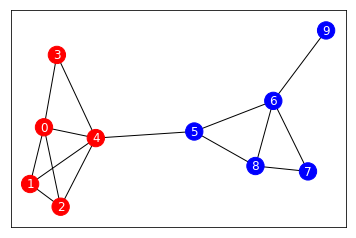

In [12]:
plot(Gt1, Mt1)

## Time 2
A third group emerges as node `4` forms new connections to `6` and `9`, and drops all but one previous connection.

In [13]:
t2 = {
    0: [1,2,3,4],
    1: [0,2],
    2: [0,1,3],
    3: [0,2],
    4: [0,6,9],
    5: [6,8],
    6: [4,5,7,8,9],
    7: [6,8],
    8: [5,6,7],
    9: [4,6]
}

In [14]:
delta(t1, t2)

nodes
	added:    []
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [4] added []
	node 2 removed [] added [3]
	node 3 removed [4] added [2]
	node 4 removed [2, 3, 5] added [9, 6]
	node 5 removed [4] added []
	node 6 removed [] added [4]
	node 7 removed [] added []
	node 8 removed [] added []
	node 9 removed [] added [4]


membership: {0: [0], 1: [0], 2: [0], 3: [0], 4: [1], 5: [2], 6: [2], 7: [2], 8: [2], 9: [1]}
clustering: 0123|94|8567


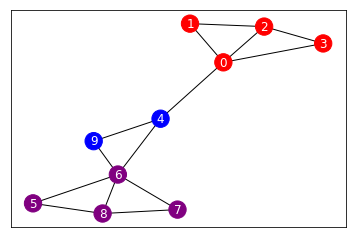

In [15]:
Gt2 = nx.from_dict_of_lists(t2)
Mt2 = louvain.best_partition(Gt2)
Ct2 = Clustering(elm2clu_dict = membership(Mt2))
summary(Gt2, Mt2, Ct2)
plot(Gt2, Mt2)

## Time 3
The third groups begins to expand, with nodes `3` and `6` moving away from their previous groups and forming more links within their own group.

In [16]:
t3 = {
    0: [1,2,4],
    1: [0,2],
    2: [0,1],
    3: [4,6,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [3,4,5,9],
    7: [5,8],
    8: [5,7],
    9: [3,4,6]
}

In [17]:
delta(t2, t3)

nodes
	added:    []
	removed:  []
links
	node 0 removed [3] added []
	node 1 removed [] added []
	node 2 removed [3] added []
	node 3 removed [0, 2] added [9, 4, 6]
	node 4 removed [] added [3]
	node 5 removed [] added [7]
	node 6 removed [8, 7] added [3]
	node 7 removed [6] added [5]
	node 8 removed [6] added []
	node 9 removed [] added [3]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [1], 7: [2], 8: [2], 9: [1]}
clustering: 012|9346|857


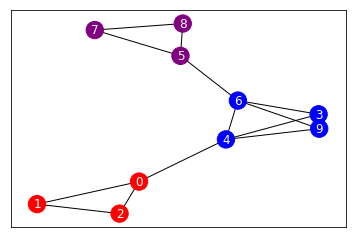

In [18]:
Gt3 = nx.from_dict_of_lists(t3)
Mt3 = louvain.best_partition(Gt3)
Ct3 = Clustering(elm2clu_dict = membership(Mt3))
summary(Gt3, Mt3, Ct3)
plot(Gt3, Mt3)

## Time 4
Two new nodes arrive, `10` and `11`, initially connecting to node `1` and each other.

In [19]:
t4 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,6,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [3,4,5,9],
    7: [5,8],
    8: [5,7],
    9: [3,4,6],
    10: [1,11],
    11: [1,10]
}

In [20]:
delta(t3, t4)

nodes
	added:    [10, 11]
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [] added [10, 11]
	node 2 removed [] added []
	node 3 removed [] added []
	node 4 removed [] added []
	node 5 removed [] added []
	node 6 removed [] added []
	node 7 removed [] added []
	node 8 removed [] added []
	node 9 removed [] added []
new nodes
	node 10 connected to [1, 11]
	node 11 connected to [1, 10]


In [21]:
Gt4 = nx.from_dict_of_lists(t4)
Mt4 = louvain.best_partition(Gt4)
Ct4 = Clustering(elm2clu_dict = membership(Mt4))
summary(Gt4, Mt4, Ct4)

membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [1], 7: [2], 8: [2], 9: [1], 10: [0], 11: [0]}
clustering: 0121011|9346|857


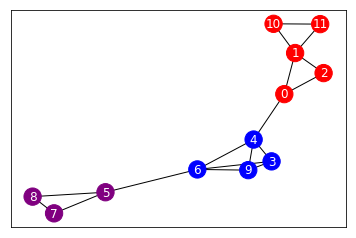

In [22]:
plot(Gt4, Mt4)

## Time 5
A fourth group emerges with three nodes: `8`, `10`, and `11`. Additionally, with a few more link additions and removals the other groups also balance out to three nodes. 

In [23]:
t5 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [4,5,7,9],
    7: [5,6],
    8: [5,10,11],
    9: [3,4,6],
    10: [1,8,11],
    11: [1,8,10]
}

In [24]:
delta(t4, t5)

nodes
	added:    []
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [] added []
	node 2 removed [] added []
	node 3 removed [6] added []
	node 4 removed [] added []
	node 5 removed [] added []
	node 6 removed [3] added [7]
	node 7 removed [8] added [6]
	node 8 removed [7] added [10, 11]
	node 9 removed [] added []
	node 10 removed [] added [8]
	node 11 removed [] added [8]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [2], 7: [2], 8: [3], 9: [1], 10: [3], 11: [3]}
clustering: 012|934|567|81011


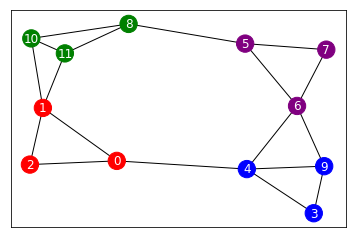

In [25]:
Gt5 = nx.from_dict_of_lists(t5)
Mt5 = louvain.best_partition(Gt5)
Ct5 = Clustering(elm2clu_dict = membership(Mt5))
summary(Gt5, Mt5, Ct5)
plot(Gt5, Mt5)

## Time 6
a subtraction (remove a node)

## Comparing Clustering

In [ ]:
elementScores, relabeled_elements = sim.element_sim_elscore(Ct1, Ct2, alpha = 0.9)

In [ ]:
print(relabeled_elements)

In [ ]:
print("{0:6s}  {1:6s}".format("Node", "Score"))
print("------  ------")
for e in relabeled_elements:
    loc = relabeled_elements[e]
    print("{0:6d}  {1:2.3f}".format(e,elementScores[loc]))

In [ ]:
cont_table = sim.contingency_table(Ct1, Ct2)

In [ ]:
print(cont_table)

In [ ]:
N11, N10, N01, N00 = sim.count_pairwise_cooccurence(Ct1, Ct2)
print(N11,
        "element pairs assigned to the same clusters in both clusterings")
print(N10,
        "element pairs assigned to the same clusters in clustering1, but "
        "different clusters in clustering2")
print(N01, "element pairs assigned to different clusters in "
               "clustering1, but the same clusters in clustering2")
print(N00, "element pairs assigned to different clusters in both "
               "clusterings")

# Viewing Change in Clustering

## prepare the data

In [26]:
import pandas as pd
import numpy as np
import qgrid

### DataFrame with cluster assignments

In [27]:
colNames = ["Node", "T1", "T2", "T3", "T4", "T5"]
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [28]:
df = pd.DataFrame(columns=colNames)

In [29]:
df.Node = nodes

In [30]:
missing = -1

count = 0
for t in [Mt1, Mt2, Mt3, Mt4, Mt5]:
    count += 1
    time = "T{}".format(count)
    v = list(t.values())
    for i in range(len(nodes) - len(v)):
        v.append(missing)
    print(time, v)
    df[time] = v

T1 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, -1, -1]
T2 [0, 0, 0, 0, 1, 2, 2, 2, 2, 1, -1, -1]
T3 [0, 0, 0, 1, 1, 2, 1, 2, 2, 1, -1, -1]
T4 [0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0]
T5 [0, 0, 0, 1, 1, 2, 2, 2, 3, 1, 3, 3]


In [31]:
w = qgrid.show_grid(df, show_toolbar=True)
w

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [262]:
def computeFlows(d1, d2, data, index):
    if len(data['targets']) > 0:
        data['sources'] = data['targets']
        data['targets'] = {}
    
    for i in range(len(d1)):
        source = d1[i]
        target = d2[i]

        if source < 0 or target < 0:
            continue

        if source in data['sources']:
            source_index = data['sources'][source]['index']
        else:
            source_index = index()
            data['sources'][source] = {'index': source_index, 'label': source}
            data['labels'].append(source)

        if target in data['targets']:
            target_index = data['targets'][target]['index']
        else:
            target_index = index()
            data['targets'][target] = {'index': target_index, 'label': target}
            data['labels'].append(target)

        flow = "{} -> {}".format(source_index, target_index)

        print("source: {} target: {} flow: {}".format(source, target, flow))

        if flow in data['flows']:
            data['flows'][flow] += 1
        else:
            data['flows'][flow] = 1

In [263]:
colorMap = {
    0: "red",
    1: "yellow",
    2: "blue",
    3: "orange",
    4: "green",
    5: "purple"
}

In [264]:
def analyzeFlows(data):
    labels = data['labels']
    colors = [colorMap[x] for x in data['labels']]
    sources = []
    targets = []
    values = []
    for flow in data['flows']:
        src = flow.split()[0]
        dst = flow.split()[2]
        sources.append(src)
        targets.append(dst)
        values.append(data['flows'][flow])
    return labels, colors, sources, targets, values

In [266]:
data = {
    'sources': {},
    'targets': {},
    'labels': [],
    'flows': {}
}

In [267]:
index = Counter(0)

In [268]:
timeColumns = ["T1", "T2", "T3", "T4", "T5"]

In [269]:
d1 = df.T1.values
d2 = df.T2.values

In [270]:
print(d1)
print(d2)

[ 0  0  0  0  0  1  1  1  1  1 -1 -1]
[ 0  0  0  0  1  2  2  2  2  1 -1 -1]


In [271]:
computeFlows(d1, d2, data, index)

source: 0 target: 0 flow: 0 -> 1
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 0 flow: 0 -> 1
source: 0 target: 1 flow: 0 -> 2
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 2 flow: 3 -> 4
source: 1 target: 1 flow: 3 -> 2


In [272]:
data

{'sources': {0: {'index': 0, 'label': 0}, 1: {'index': 3, 'label': 1}},
 'targets': {0: {'index': 1, 'label': 0},
  1: {'index': 2, 'label': 1},
  2: {'index': 4, 'label': 2}},
 'labels': [0, 0, 1, 1, 2],
 'flows': {'0 -> 1': 4, '0 -> 2': 1, '3 -> 4': 4, '3 -> 2': 1}}

In [273]:
analyzeFlows(data)

([0, 0, 1, 1, 2],
 ['red', 'red', 'yellow', 'yellow', 'blue'],
 ['0', '0', '3', '3'],
 ['1', '2', '4', '2'],
 [4, 1, 4, 1])

In [275]:
lables, colors, sources, targets, values = analyzeFlows(data)

In [277]:
plotFlow(labels, colors, sources, targets, values)

In [195]:
list(data['labels'].values())

[0, 0, 0, 1, 1]

In [149]:
data['sources'][0]

{'node': 0, 'label': 'source-0'}

In [114]:
for i in range(len(timeColumns)):
    j = i + 1
    if j < len(timeColumns):
        print(i, j, timeColumns[i], timeColumns[j])

0 1 T1 T2
1 2 T2 T3
2 3 T3 T4
3 4 T4 T5


In [108]:
timeColumns[4]

'T5'

In [ ]:
# T1 = A
# T2 = B
# T3 = C
# T4 = D
# T5 = E

In [43]:
import plotly.plotly as py

def plotFlow(labels, colors, sources, targets, values):
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labels,
          color = colors
        ),
        link = dict(
          source = sources,
          target = targets,
          value = values
      ))

    layout =  dict(
        title = "Title",
        font = dict(
          size = 10
        )
    )

    fig = dict(data=[data], layout=layout)
    return py.iplot(fig, validate=False)

### Manually construct Flow data

The below creates an alluvial with a few undesired effects:
- when nodes are added at the time marked `C`, a new origin appears aligned with time `A`

In [40]:
#.         0     1     2     3     4     5     6     7     8      9     10    11    12    13    14    15
labels = ["A0", "A1", "B0", "B1", "B2", "C0", "C1", "C2", "C-1", "D0", "D1", "D2", "E0", "E1", "E2", "E3"]
colors = ["red", "blue", "red", "blue", "purple", "red", "blue", "purple", "green", "red", "blue", "purple", "red", "blue", "purple", "orange"]
sources = [0,0,1,1,   2,2,3,4,4,   5, 6, 7,8,    9, 9,10,10,11,11]
targets = [2,3,3,4,   5,6,6,6,7,   9,10,11,9,   12,15,13,14,14,15]
values =  [4,1,1,4,   3,1,2,1,3,   3, 4, 3,2,    3, 2, 3, 1, 2, 1]

In [46]:
plotFlow(labels, colors, sources, targets, values)

Perhaps if we use proportions for the values (amount) instead of quantity, the flow might not present any undesired effects.

We should also consider whether we can identify addition and subtraction by visually observing a difference in the size of an inbound and outbound flow from a node.

Or, we might annotate the flows with their portion size or some other marker which indicates an increase or decrease in inbound and outbound flow.

In [47]:
# The values must become proportions
# Node C-1 (8) needs to be removed
# 

#.          0      1       2      3       4         5      6       7      -8-   9     10    11    12    13    14    15
labels =  ["A0",  "A1",   "B0",  "B1",   "B2",     "C0",  "C1",   "C2",        "D0", "D1", "D2", "E0", "E1", "E2", "E3"]
colors =  ["red", "blue", "red", "blue", "purple", "red", "blue", "purple",    "red", "blue", "purple", "red", "blue", "purple", "orange"]
sources = [0,0,1,1,   2,2,3,4,4,   5, 6, 7,      9, 9,10,10,11,11]
targets = [2,3,3,4,   5,6,6,6,7,   9,10,11,     12,15,13,14,14,15]
values =  [4,1,1,4,   3,1,2,1,3,   3, 4, 3,      3, 2, 3, 1, 2, 1]

In [48]:
plotFlow(labels, colors, sources, targets, values)

In [49]:
import pandas as pd

nodeColNames = ["Time", "Label", "Color"]
node_df = pd.DataFrame(columns=nodeColNames)

flowColNames = ["Time", "Source", "Target", "Value", "Proportion"]
flow_df = pd.DataFrame(columns=flowColNames)

In [50]:
flow_df.Time = [1,1,1,1, 2,2,2,2,2, 3,3,3, 4,4,4,4,4,4]
flow_df.Source = sources
flow_df.Target = targets
flow_df.Value = values

node_df.Label = labels
node_df.Color = colors

### compute the proportions

In [96]:
scaleFactor = 100
values = []
for i in flow_df.index:
    time = flow_df['Time'][i]
    value = flow_df['Value'][i]
    total = sum(flow_df.loc[flow_df['Time'] == time]['Value'])
    values.append(round(scaleFactor*(value/total), 3))

In [97]:
values

[40.0,
 10.0,
 10.0,
 40.0,
 30.0,
 10.0,
 20.0,
 10.0,
 30.0,
 30.0,
 40.0,
 30.0,
 25.0,
 16.667,
 25.0,
 8.333,
 16.667,
 8.333]

In [98]:
flow_df.Proportion = values

### show the DataFrame

In [99]:
import qgrid
flow_w = qgrid.show_grid(flow_df, show_toolbar=True)
flow_w

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [83]:
flow_df = flow_w.get_changed_df()

In [100]:
node_w = qgrid.show_grid(node_df, show_toolbar=True)
node_w

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [86]:
node_df = node_w.get_changed_df()

In [101]:
plotFlow(node_df.Label, node_df.Color, flow_df.Source, flow_df.Target, flow_df.Proportion)

In [ ]:
index = 0
for time in ["T1", "T2", "T3", "T4", "T5"]:
    index += 1
    clustering = df[time].values
    clusters = set(list(filter(lambda x: x >= 0, clustering)))
    flow = {}
    for src in clusters:
        flow[src] = {}
        for dst in clusters:
            flow[src][dst] = 0
    print(time, index, clusters, values, flow)

In [ ]:
def flow(source, target):
    sources = set(list(filter(lambda x: x >= 0, source)))
    targets = set(list(filter(lambda x: x >= 0, target)))
    flows = {}
    for src in sources:
        flows[src] = {}
        for dst in targets:
            flows[src][dst] = 0
    for i in range(10):
        src = source[i]
        dst = target[i]
        flows[src][dst] += 1
    return flows

In [ ]:
F1 = flow(df.T1.values, df.T2.values)

In [ ]:
F1

In [ ]:
set(F1.keys())

In [ ]:
F1.values()

In [ ]:
d = []
for x in F1.values():
    for y in x.keys():
        d.append(y)
print(set(d))

In [ ]:
F1

In [ ]:
src_labels = set()
dst_labels = set()

for src in F1.keys():
    src_labels.add("A{}".format(src))
    for dst in F1[src]:
        dst_labels.add("B{}".format(dst))

In [ ]:
src_labels

In [ ]:
dst_labels

In [ ]:
f = set()

In [ ]:
f

In [ ]:
f.add("A1")

In [ ]:
f

**To Do:**
- added nodes
- removed nodes

# Show Change

In [ ]:
labels = node_df.Label
colors = node_df.Color
sources = flow_df.Source
targets = flow_df.Target
values = flow_df.Value

## Use `ipysankeywidget` and `floweaver`
- [`ipysankeywidget`](https://github.com/ricklupton/ipysankeywidget)
- [`floweaver`](https://github.com/ricklupton/floweaver)
  - [docs](https://floweaver.readthedocs.io/en/latest/index.html)

In [ ]:
import pandas as pd
from io import StringIO

flows = pd.read_csv(StringIO("""
source,target,type,value
a,b,main,2
a,c,main,1
c,d,main,3
b,c,back,2
"""))

flows

In [ ]:
from floweaver import *

# Set the default size to fit the documentation better.
size = dict(width=570, height=300)

nodes = {
    'a': ProcessGroup(['a']),
    'b': ProcessGroup(['b']),
    'c': ProcessGroup(['c']),
    'd': ProcessGroup(['d']),
    'back': Waypoint(direction='L'),
}

bundles = [
    Bundle('a', 'b'),
    Bundle('a', 'c'),
    Bundle('b', 'c', waypoints=['back']),
    Bundle('c', 'd'),
    Bundle('c', 'b'),
]

ordering = [
    [['a'], []],
    [['b', 'c'], ['back']],
    [['d'], []],
]

sdd = SankeyDefinition(nodes, bundles, ordering)

weave(sdd, flows).to_widget(**size)

# Plotly Sankey example

In [ ]:
import plotly.plotly as py

data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = ["blue", "blue", "blue", "blue", "blue", "blue"]
    ),
    link = dict(
      source = [0,1,0,2,3,3],
      target = [2,3,3,4,4,5],
      value = [8,4,2,8,4,2]
  ))

layout =  dict(
    title = "Basic Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

## See if we can use some external JavaScript library to build Sankey Graphs
- Google
- Semiotic

In [286]:
%%javascript
require.config({
  paths: {
      googlecharts: 'https://www.gstatic.com/charts/loader.js',
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/4.9.1/d3.min',
      react: 'https://unpkg.com/react@15.3.2/dist/react',
      reactdom: 'https://unpkg.com/react-dom@15.3.2/dist/react-dom',
      semiotic: 'https://unpkg.com/semiotic/dist/semiotic.min.js'
  }});

<IPython.core.display.Javascript object>

In [281]:
%%javascript

var d3 = require(['d3']);

<IPython.core.display.Javascript object>

In [285]:
%%javascript

var reactdom = require(['reactdom']);
var semiotic = require(['semiotic']);

<IPython.core.display.Javascript object>

In [288]:
%%javascript

var gcharts = require(['googlecharts']);

gcharts.charts.load('current', {packages: ['corechart']});


<IPython.core.display.Javascript object>